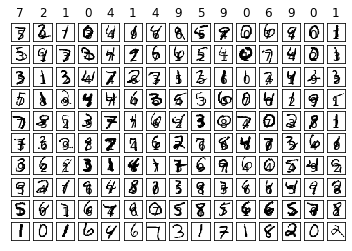

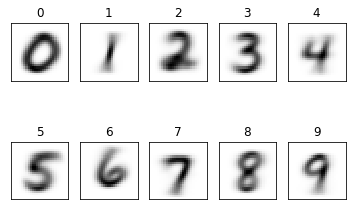

In [2]:
  import matplotlib.pyplot as plt
  import numpy as np

  file_data   = "mnist.csv"
  handle_file = open(file_data, "r")
  data        = handle_file.readlines()
  handle_file.close()

  size_row    = 28    # height of the image
  size_col    = 28    # width of the image

  num_image   = len(data)
  count       = 0     # count for the number of images

  #
  # normalize the values of the input data to be [0, 1]
  #
  def normalize(data):

      data_normalized = (data - min(data)) / (max(data) - min(data))

      return(data_normalized)

  #
  # example of distance function between two vectors x and y
  #
  def distance(x, y):

      d = (x - y) ** 2
      s = np.sum(d)
      # r = np.sqrt(s)

      return(s)

  #
  # make a matrix each column of which represents an images in a vector form
  #
  list_image  = np.empty((size_row * size_col, num_image), dtype=float)
  list_label  = np.empty(num_image, dtype=int)

  for line in data:

      line_data   = line.split(',')
      label       = line_data[0]
      im_vector   = np.asfarray(line_data[1:])
      im_vector   = normalize(im_vector)

      list_label[count]       = label
      list_image[:, count]    = im_vector

      count += 1

  #
  # plot first 150 images out of 10,000 with their labels
  #
  f1 = plt.figure(1)

  for i in range(150):

      label       = list_label[i]
      im_vector   = list_image[:, i]
      im_matrix   = im_vector.reshape((size_row, size_col))

      plt.subplot(10, 15, i+1)
      plt.title(label)
      plt.imshow(im_matrix, cmap='Greys', interpolation='None')

      frame   = plt.gca()
      frame.axes.get_xaxis().set_visible(False)
      frame.axes.get_yaxis().set_visible(False)


  #plt.show()

  #
  # plot the average image of all the images for each digit
  #
  f2 = plt.figure(2)

  im_average  = np.zeros((size_row * size_col, 10), dtype=float)
  im_count    = np.zeros(10, dtype=int)

  for i in range(num_image):

      im_average[:, list_label[i]] += list_image[:, i]
      im_count[list_label[i]] += 1

  for i in range(10):

      im_average[:, i] /= im_count[i]

      plt.subplot(2, 5, i+1)
      plt.title(i)
      plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

      frame   = plt.gca()
      frame.axes.get_xaxis().set_visible(False)
      frame.axes.get_yaxis().set_visible(False)

  plt.show()

In [3]:
from collections import OrderedDict

class Affine:

  def __init__(self, W):
    self.W = W
    self.x = None
    self.dW = None

  def forward(self, x):
    x = np.concatenate((np.expand_dims(np.ones(x.shape[0]), axis = 1), x), axis = 1)
    self.x = x
    out = np.dot(x, self.W)
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T[:,1:])
    self.dW = np.dot(self.x.T, dout)
    return dx

class sigmoid:

  def __init__(self):
    self.out = None

  def forward(self,x):
      out = 1. / (1. + np.exp(-x))
      self.out = out
      return out

  def backward(self,dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class ThreeLayerNet:

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, rambda, std = 0.1):
        
        self.rambda = rambda
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size+1, hidden_size1)  # xavier
        self.params['W2'] = std * np.random.randn(hidden_size1+1, hidden_size2) 
        self.params['W3'] = std * np.random.randn(hidden_size2+1, output_size) 
        #np.concatenate((np.random.randn(input_size+1, hidden_size1).T, np.expand_dims(np.ones(hidden_size1), axis = 1)), axis = 1)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'])
        self.layers['sigmoid1'] = sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'])
        self.layers['sigmoid2'] = sigmoid()
        self.layers['Affine3'] = Affine(self.params['W3'])
        self.layers['sigmoid3'] = sigmoid()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
        
    # x : 입력 데이터, t : 정답 레이블

    def loss(self, x, t, rambda):
        y = self.predict(x)

        t = np.int64(np.expand_dims(t, axis = 1))
        a = np.zeros((t.shape[0],10), dtype = int)
        for i in range(t.shape[0]):
          a[i,t[i]] = 1
        delta = 1e-7
        return -np.sum(a * np.log(y + delta) + (1-a) * np.log(1-y+delta)) / float(x.shape[0]) \
    + rambda / 2 / (len(network.params['W1'])+len(network.params['W2']+len(network.params['W3']))) \
    * (np.sum(np.power(self.params['W1'], 2))+np.sum(np.power(self.params['W2'],2))+np.sum(np.power(self.params['W3'],2)))

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블

    def gradient(self, x, t, rambda):
 
        y = self.predict(x)
        t = np.int64(np.expand_dims(t, axis = 1))
        a = np.zeros((t.shape[0],10), dtype = int)
        for i in range(t.shape[0]):
          a[i,t[i]] = 1
        dout = y-a

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['W2'] = self.layers['Affine2'].dW
        grads['W3'] = self.layers['Affine3'].dW

        return grads

In [4]:
x_train = list_image[:, :1000].T
t_train = list_label[:1000]
x_test = list_image[:, 1000:].T
t_test = list_label[1000:]

In [5]:
network = ThreeLayerNet(input_size=784, hidden_size1=196, hidden_size2 = 49,output_size=10, rambda = 0.8)
iters_num = 10000
train_size = x_train.shape[0]
learning_rate = 0.001
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
decay = 0.001

for i in range(iters_num):
    
    grad = network.gradient(x_train, t_train, network.rambda) 
    for key in ('W1','W2','W3'):
        network.params[key] -= learning_rate * grad[key] + learning_rate * network.rambda / x_train.shape[0] * network.params[key]
    
    train_loss = network.loss(x_train, t_train, network.rambda)  
    test_loss = network.loss(x_test, t_test, network.rambda)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    if i % 10 == 0:
        learning_rate = learning_rate * 1/(1 + decay)
        print(train_loss, test_loss, train_acc, test_acc)
    if i > 1000:
        if train_loss_list[-1] > train_loss_list[-2]: #check convergence
            learning_rate = learning_rate * 1/(1 + decay)

4.150813721674931 4.153921389445126 0.137 0.1218888888888889
3.904805700693192 3.917997984434291 0.135 0.11866666666666667
3.8967554763913945 3.9131386863550364 0.133 0.11822222222222223
3.889804851632196 3.907662092780198 0.139 0.12155555555555556
3.88258874424346 3.901537030895768 0.144 0.12544444444444444
3.8749503072380445 3.8949776450725233 0.15 0.13144444444444445
3.8667557727045567 3.8879600488150325 0.156 0.1388888888888889
3.85785008885195 3.8803789746389694 0.166 0.14655555555555555
3.848048377135185 3.8720892525403925 0.178 0.15388888888888888
3.8371261992492554 3.862908279470459 0.187 0.162
3.8248066735681796 3.852605591935042 0.199 0.17033333333333334
3.8107442010884145 3.840884948049923 0.211 0.17922222222222223
3.794506670400982 3.8273603496382242 0.227 0.18955555555555556
3.775565178766478 3.811532627747533 0.236 0.202
3.7533189660707285 3.792792758816909 0.247 0.21555555555555556
3.727215211176016 3.770516903687095 0.256 0.2298888888888889
3.697028001916058 3.744337297

1.4465962967287678 1.7690448784025723 0.955 0.8676666666666667
1.4429494723525802 1.7671993771353651 0.956 0.8678888888888889
1.4393655856831435 1.7654057475557914 0.956 0.8686666666666667
1.4358430909918356 1.7636628132443992 0.956 0.869
1.4323804903864932 1.7619694379544217 0.956 0.869
1.4289763319010018 1.7603245218958081 0.957 0.869
1.4256292077085253 1.758726998175146 0.958 0.8687777777777778
1.422337752450968 1.7571758294295434 0.958 0.8691111111111111
1.4191006416759473 1.7556700046925098 0.958 0.8692222222222222
1.4159165903715454 1.7542085365272495 0.959 0.8693333333333333
1.4127843515885021 1.7527904584576441 0.96 0.8698888888888889
1.409702715139474 1.7514148227198885 0.96 0.8702222222222222
1.4066705063655012 1.750080698348777 0.96 0.8704444444444445
1.403686584960889 1.7487871696026331 0.96 0.8706666666666667
1.4007498438491752 1.7475333347206081 0.961 0.8708888888888889
1.3978592081045615 1.7463183049962039 0.961 0.8713333333333333
1.395013633914973 1.7451412041420742 0.9

1.2288628982394327 1.7216473601662936 0.986 0.8772222222222222
1.2282588560364418 1.7218084399472122 0.986 0.8773333333333333
1.2276620686191237 1.7219715529177284 0.986 0.8771111111111111
1.227072440747506 1.7221366361982757 0.986 0.8771111111111111
1.226489878540079 1.7223036266888292 0.986 0.8771111111111111
1.2259142894318127 1.7224724610359161 0.986 0.8771111111111111
1.2253455821361596 1.7226430755980124 0.986 0.8771111111111111
1.2247836666124212 1.7228154064107581 0.986 0.8771111111111111
1.224228454039833 1.7229893891536583 0.986 0.877
1.2236798567996885 1.7231649591201688 0.986 0.8771111111111111
1.2231377884666739 1.7233420511932556 0.986 0.8771111111111111
1.2226021638103677 1.7235205998286733 0.986 0.8771111111111111
1.2220728988075438 1.7237005390482647 0.986 0.8768888888888889
1.2215499106655334 1.7238818024456195 0.986 0.8771111111111111
1.221033117856428 1.7240643232063348 0.986 0.8771111111111111
1.2205224401614072 1.7242480341449573 0.986 0.8772222222222222
1.2200177

1.188408700311493 1.7472198896143363 0.99 0.8786666666666667
1.1882960228486794 1.7474177768301085 0.99 0.8786666666666667
1.188184868220384 1.7476160375195056 0.99 0.8785555555555555
1.1880752184544 1.7478146568591417 0.99 0.8785555555555555
1.1879670546728114 1.748013617059482 0.99 0.8785555555555555
1.187860357127608 1.7482128973975162 0.99 0.8785555555555555
1.1877551052627497 1.7484124743012055 0.99 0.8786666666666667
1.187651277800982 1.7486123214857123 0.99 0.8787777777777778
1.1875488528525902 1.7488124101396143 0.99 0.8787777777777778
1.1874478080422943 1.7490127091574519 0.99 0.8786666666666667
1.187348120649724 1.7492131854132662 0.99 0.8786666666666667
1.1872497677583782 1.7494138040683298 0.99 0.8786666666666667
1.1871527264077848 1.7496145289051284 0.99 0.8786666666666667
1.187056973743632 1.749815322678903 0.99 0.8788888888888889
1.186962487161042 1.7500161474777363 0.99 0.8787777777777778
1.1868692444367661 1.750216965082265 0.99 0.8787777777777778
1.1867772238468857 1.

1.1815045022036132 1.7718146539972928 0.99 0.8801111111111111
1.1814929185426226 1.7719663447821012 0.99 0.8801111111111111
1.181481642023824 1.7721176994610062 0.99 0.8801111111111111
1.1814706691042094 1.7722687186002397 0.99 0.8801111111111111
1.18145999627902 1.7724194027596725 0.99 0.88
1.1814496200813138 1.7725697524931028 0.99 0.88
1.1814395370815336 1.7727197683485307 0.99 0.88
1.1814297438870789 1.7728694508684202 0.99 0.88
1.1814202371418847 1.7730188005899494 0.99 0.88
1.1814110135259974 1.7731678180452475 0.99 0.88
1.1814020697551586 1.7733165037616185 0.99 0.88
1.1813934025803905 1.773464858261758 0.99 0.88
1.1813850087875866 1.7736128820639545 0.99 0.88
1.1813768851971025 1.773760575682283 0.99 0.8798888888888889
1.1813690286633534 1.7739079396267858 0.99 0.8798888888888889
1.1813614360744151 1.7740549744036482 0.99 0.8798888888888889
1.1813541043516254 1.7742016805153586 0.99 0.8798888888888889
1.1813470304491935 1.7743480584608649 0.99 0.8798888888888889
1.1813402113538

1.1814712948311281 1.7864075724180002 0.991 0.8801111111111111
1.1814740691514372 1.7864543453854633 0.991 0.8801111111111111
1.1814768258801023 1.786500579792711 0.991 0.8802222222222222
1.1814795648725924 1.7865462820922107 0.991 0.8802222222222222
1.1814822859952927 1.786591458654293 0.991 0.8802222222222222
1.1814849891251125 1.7866361157682862 0.991 0.8802222222222222
1.1814876741491058 1.7866802596436326 0.991 0.8802222222222222
1.1814903409641064 1.7867238964109875 0.991 0.8802222222222222
1.181492989476373 1.7867670321233053 0.991 0.8802222222222222
1.1814956196012458 1.7868096727569043 0.991 0.8802222222222222
1.1814982312628135 1.7868518242125178 0.991 0.8802222222222222
1.181500824393594 1.7868934923163313 0.991 0.8802222222222222
1.1815033989342212 1.786934682820998 0.991 0.8802222222222222
1.1815059548331455 1.786975401406648 0.991 0.8802222222222222
1.1815084920463426 1.7870156536818738 0.991 0.8802222222222222
1.1815110105370301 1.7870554451847058 0.991 0.880222222222222

1.1816926815915392 1.7896040812623117 0.991 0.8805555555555555
1.1816935172557634 1.789614687916743 0.991 0.8805555555555555
1.181694344266495 1.7896251769346008 0.991 0.8805555555555555
1.1816951627070829 1.7896355496376717 0.991 0.8805555555555555
1.1816959726602345 1.7896458073325365 0.991 0.8805555555555555
1.1816967742080142 1.7896559513107488 0.991 0.8805555555555555
1.1816975674318484 1.7896659828490202 0.991 0.8805555555555555
1.1816983524125195 1.789675903209392 0.991 0.8805555555555555
1.1816991292301724 1.7896857136394146 0.991 0.8805555555555555
1.1816998979643136 1.7896954153723201 0.991 0.8805555555555555
1.1817006586938121 1.78970500962719 0.991 0.8805555555555555
1.1817014114969004 1.7897144976091282 0.991 0.8805555555555555
1.1817021564511767 1.7897238805094244 0.991 0.8805555555555555
1.1817028936336058 1.7897331595057206 0.991 0.8805555555555555
1.1817036231205211 1.7897423357621716 0.991 0.8805555555555555
1.1817043449876268 1.7897514104296062 0.991 0.88055555555555

1.1817523493513002 1.7903427502304161 0.991 0.8806666666666667
1.1817525527122896 1.7903452071585817 0.991 0.8806666666666667
1.18175275387331 1.7903476371283569 0.991 0.8806666666666667
1.1817529528578934 1.790350040436541 0.991 0.8806666666666667
1.1817531496893248 1.7903524173766427 0.991 0.8806666666666667
1.1817533443906476 1.7903547682389198 0.991 0.8806666666666667
1.1817535369846641 1.7903570933104136 0.991 0.8806666666666667
1.1817537274939365 1.790359392874985 0.991 0.8806666666666667
1.1817539159407928 1.7903616672133524 0.991 0.8806666666666667
1.1817541023473273 1.7903639166031253 0.991 0.8806666666666667
1.1817542867354018 1.7903661413188385 0.991 0.8806666666666667
1.1817544691266504 1.790368341631988 0.991 0.8806666666666667
1.181754649542478 1.7903705178110632 0.991 0.8806666666666667
1.1817548280040684 1.7903726701215839 0.991 0.8806666666666667
1.1817550045323804 1.7903747988261296 0.991 0.8806666666666667
1.181755179148153 1.7903769041843733 0.991 0.8806666666666667

# Plot the loss curve

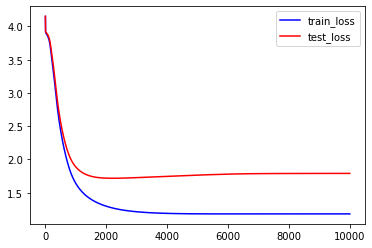

In [6]:
a = [i for i in range(10000)]
plt.plot(a, train_loss_list,label = 'train_loss', c = 'b')
plt.plot(a, test_loss_list,label = 'test_loss', c = 'r')
plt.legend()
plt.show()

# Plot the accuracy curve

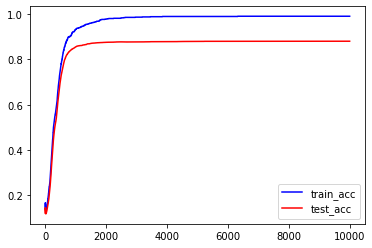

In [7]:
plt.plot(a, train_acc_list,label = 'train_acc', c = 'b')
plt.plot(a, test_acc_list,label = 'test_acc', c = 'r')
plt.legend()
plt.show()

# Plot the accuracy value

In [8]:
print("final train accuracy: {0}%".format(train_acc*100))

final train accuracy: 99.1%


In [9]:
print("final test accuracy: {0}%".format(test_acc*100))

final test accuracy: 88.06666666666668%


In [10]:
output = network.predict(x_test)
output = np.argmax(output, axis = 1)

In [11]:
correct_count = 0
incorrect_count = 0
image_idx = 0
correct_label = []
incorrect_label = []

while correct_count < 10 or incorrect_count < 10:
  if output[image_idx] == t_test[image_idx]:
    correct_count += 1
    correct_label.append(image_idx)
  else:
    incorrect_count += 1
    incorrect_label.append((image_idx, output[image_idx]))

  image_idx += 1


# 10 correctly classified testing images

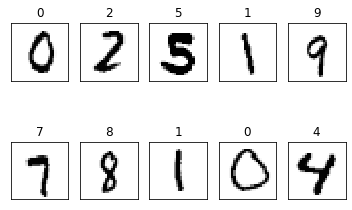

In [12]:
f1 = plt.figure(1)

for i in range(10):
      label       = t_test[correct_label[i]]
      im_vector   = x_test[correct_label[i],:]
      im_matrix   = im_vector.reshape((size_row, size_col))

      plt.subplot(2, 5, i+1)
      plt.title(label)
      plt.imshow(im_matrix, cmap='Greys', interpolation='None')

      frame   = plt.gca()
      frame.axes.get_xaxis().set_visible(False)
      frame.axes.get_yaxis().set_visible(False)
  

# 10 incorrectly classified testing images

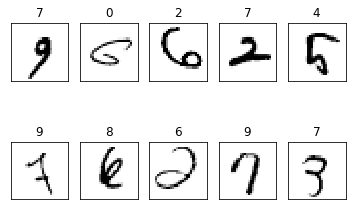

In [13]:
for i in range(10):
      label       = incorrect_label[i][1]
      im_vector   = x_test[incorrect_label[i][0],:]
      im_matrix   = im_vector.reshape((size_row, size_col))

      plt.subplot(2, 5, i+1)
      plt.title(label)
      plt.imshow(im_matrix, cmap='Greys', interpolation='None')

      frame   = plt.gca()
      frame.axes.get_xaxis().set_visible(False)
      frame.axes.get_yaxis().set_visible(False)